# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file= "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# Added number of validation examples to verify there are zero as the video noted
# Note that it says there are 4410 validation examples so this seems to have changed
# since the video was created meaning we don't need to split validation examples
# off from the training set(20% recommended as a good rule of thumb) using 
# from sklearn.utils import train_test_split
n_valid = len(X_valid)

# TODO: What's the shape of an traffic sign image?
# train['features'] indexes [ex #][width index][height index[channel]
image_shape = (len(train['features'][0]), len(train['features'][0][0]))

# add original sign coordinates relative to ORIGINAL dimensions NOT 32x32
coords = train['coords'][0]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_valid)
print("Image data shape =", image_shape)
print("Original sign coords = ", coords)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32)
Original sign coords =  [ 6  5 21 20]
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Correct Classification ID:  9
Correct Sign Name:  No passing


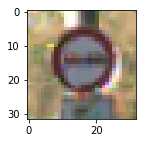

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random, csv
# Visualizations will be shown in the notebook.
%matplotlib inline

# Load the signnames.csv file as a dictionary with ClassId as key
with open('signnames.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    stuff = []
    for line in reader:
        stuff.append(line)
sign_types = {}
for i in stuff:
    sign_types[i["ClassId"]] = i["SignName"]

# pick a random sign to visualize
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(2,2))
plt.imshow(image)
print("Correct Classification ID: ", y_train[index])
sign_name = sign_types[str(y_train[index])]
print("Correct Sign Name: ", sign_name)

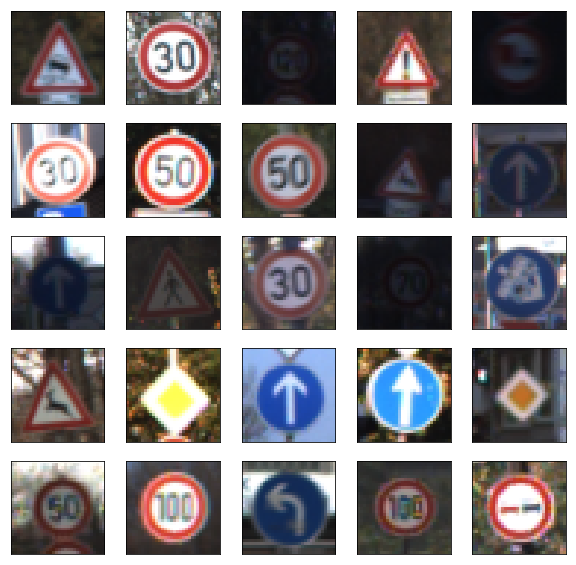

In [89]:
# use plt.subplot() to make a grid of example images
# close the plots that are open as there were too many for memory
plt.close('all')
fig = plt.figure(figsize=(10,10))
# visualize 25 random signs
for i in range(25):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(image.squeeze())


[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]


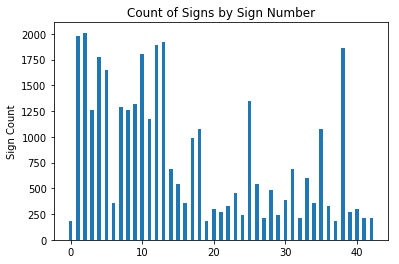

In [97]:
# visualize counts of each sign type
# https://matplotlib.org/examples/api/barchart_demo.html
bins = np.bincount(y_train)
ind = np.arange(len(bins))
print(bins)
fig, ax = plt.subplots()
ax.bar(ind, bins, width=.5)
ax.set_ylabel('Sign Count')
ax.set_title('Count of Signs by Sign Number')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

augment:  True
initial data size:  (34799, 32, 32)
x_rotated data size:  (34799, 32, 32)
augmented X data size:  (69598, 32, 32)
augmented y data size:  (69598,)
final data size/shape:  (69598, 32, 32, 1)
augment:  False
final data size/shape:  (4410, 32, 32, 1)
index:  34484
Correct Classification ID:  25
Correct Sign Name:  Road work


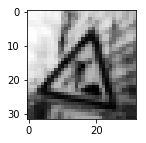

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import numpy as np
from sklearn.utils import shuffle
from skimage import exposure
from skimage.transform import rotate
import matplotlib.pyplot as plt
import random, csv


# image transformation for data augmentation - currently only rotate
def transform(X, deg):    
    for i in range(X.shape[0]):
        X[i] = rotate(X[i], random.uniform(-deg, deg), mode = 'edge')
    return X

# data preprocessing
def preprocess(X, y, augment = False):
    
    # Use the Y channel of YUV as grayscale channel
    X = 0.299 * X[:, :, :, 0] + 0.587 * X[:, :, :, 1] + 0.114 * X[:, :, :, 2]

    # Augment the data(X) with random rotation +/- deg if augmentation is requested
    print("augment: ", augment)
    if augment:
        print("initial data size: ",X.shape)
        X_rotated = transform(X, 15.)
        print("x_rotated data size: ",X_rotated.shape)
        X = np.append(X, X_rotated, axis = 0)
        y = np.append(y, y, axis = 0)
        print("augmented X data size: ",X.shape)
        print("augmented y data size: ",y.shape)

    #normalize the data to -1 to 1
    X = ((X - 128.0)/128.0).astype(np.float32)

    # apply histogram equalization recommended from forums & Yann Lecun
    # unable to utilize resolve adapthist errors, utilizing hist
    # note that input image must already be normalized
    for i in range(X.shape[0]):
        X[i] = exposure.equalize_hist(X[i])

    # Add a single grayscale channel since Y conversion dropped 4th/channel dimension
    X = X.reshape(X.shape + (1,))
    print("final data size/shape: ",X.shape)
    
    return X, y

# preprocess the training data augmented with rotation
X_train_aug, y_train_aug = preprocess(X_train, y_train, augment=True)
X_valid_pp, y_valid_pp = preprocess(X_valid, y_valid)

# pick a random sign to visualize
index = random.randint(0, len(X_train_aug))
print("index: ", index)
image = X_train_aug[index].squeeze()
plt.figure(figsize=(2,2))
plt.imshow(image, cmap='gray')
print("Correct Classification ID: ", y_train_aug[index])
sign_name = sign_types[str(y_train_aug[index])]
print("Correct Sign Name: ", sign_name)

### Model Architecture

In [25]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from collections import namedtuple
from tensorflow.contrib.layers import flatten

# layer helper functions
# note I'm using tf.get_variable as described here https://www.tensorflow.org/programmers_guide/variable_scope
# because initial implementation had problems with saving and restoring variables with the session
# also using a xavier initializer rather than random_normal per suggestions from the forums

# kernel_shape/filter size, output depth, stride are the key hyperparameters
def conv_relu(input, filter_size, k_out, stride, pad='SAME'):
    # Create variable named "weights".
    weights = tf.get_variable("weights",
        shape = [filter_size, filter_size, input.get_shape()[3], k_out],
        initializer = tf.contrib.layers.xavier_initializer()
        )
    # Create variable named "biases".
    biases = tf.get_variable("biases", k_out,
        initializer=tf.constant_initializer(0.0)
        )
    conv = tf.nn.conv2d(input, weights,
        strides=[1, stride, stride, 1],
        padding=pad
        )
    return tf.nn.relu(conv + biases)

# k/filter size and stride are the key hyperparameters
def pool(input, ksize, stride, pad='SAME'):
    return tf.nn.max_pool(input,
                ksize=[1, ksize, ksize, 1],
                strides = [1, stride, stride, 1],
                padding=pad)

# kernel_shape/filter size, output depth, stride are the key hyperparameters
def f_connected(input, k_output, pad='SAME'):
    # Create variable named "weights".
    weights = tf.get_variable("weights", 
        shape = [input.get_shape()[1], k_output],
        initializer=tf.contrib.layers.xavier_initializer()
        )
    # Create variable named "biases".
    biases = tf.get_variable("biases", k_output,
        initializer=tf.constant_initializer(0.0)
        )
    return tf.matmul(input, weights) + biases

def f_connected_relu(input, k_output, pad='SAME'):
    return tf.nn.relu(f_connected(input, k_output, pad))

# create a named tuple to pass in model parameters per suggestion from forums
# this would allow tuning of the parameters externally if desired
Params = namedtuple('Params', [
        # Data parameters
        'num_logits', 'image_size', 
        # Training parameters
        'batch_size', 'epochs',
        # Optimization
        'learning_rate',
        # Model architecture
        # f: filter size
        # k_out: depth/# of outputs
        # s: stride
        # kp: keep probability for dropout during training - currently only fc layers
        # could add padding here if want to make this variable
        'conv1_f', 'conv1_k_out', 'conv1_stride',
        'pool1_f', 'pool1_s', 
        'conv2_f', 'conv2_k_out', 'conv2_stride',
        'pool2_f', 'pool2_s',  
        'fc1_k_out', 'fc1_kp',
        'fc2_k_out', 'fc2_kp'
    ])

# Define the model
def model(input, params, is_training):
    ''' 
        input: batch of image tensors
        params: named_tuple to pass in model parameters
        is_training: tf.boolean for condition on whether training or not 
                        https://www.tensorflow.org/api_docs/python/tf/cond
    '''
    # Convolution layers
    with tf.variable_scope('conv1'):
        conv1 = conv_relu(input, filter_size=params.conv1_f, k_out=params.conv1_k_out, stride=params.conv1_stride) 
        pool1 = pool(conv1, ksize=params.pool1_f, stride=params.pool1_s)
    with tf.variable_scope('conv2'):
        conv2 = conv_relu(pool1, filter_size=params.conv2_f, k_out=params.conv2_k_out, stride=params.conv2_stride) 
        pool2 = pool(conv2, ksize=params.pool2_f, stride=params.pool2_s)

    # combine feedforward pool1 output with pool2 as input to fully connected layers
    fc_input = tf.concat(1, [flatten(conv1), flatten(conv2)])
    
    # Fully connected layers
    with tf.variable_scope('fc1'):
        fc1 = f_connected_relu(fc_input, k_output=params.fc1_k_out)
        # apply dropout if training
        fc1 = tf.cond(is_training, lambda: tf.nn.dropout(fc1, keep_prob=params.fc1_kp,), lambda: fc1)
    with tf.variable_scope('fc2'):
        fc2 = f_connected_relu(fc1, k_output=params.fc2_k_out)
        # apply dropout if training
        fc2 = tf.cond(is_training, lambda: tf.nn.dropout(fc2, keep_prob=params.fc2_kp), lambda: fc2)
    with tf.variable_scope('output'):
        logits = f_connected(fc2, k_output=params.num_logits)
        
    return logits
    



In [ ]:
# original calculations for layer sizes before moving to functions which auto calculate
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x10.
    # Convolution filter - calculated from new_height = (input_height - filter_height + 2 P)/S + 1
    # could have a filter_size width and height but no need since usually square
    # filter_size = 5
    # Layer 1p: Pooling. Input = 28x28x10. Output = 14x14x10.
    # Pooling filter - calculated from new_height = (input_height - filter_height + 2 P)/S + 1
    # could have a k_filter_size width & height but since generally square no need
    # k_filter_size = 2
    # Layer 2: Convolutional. Input = 14x14x10 Output = 10x10x20. Filter size 5
    # Layer 2p: Pooling. Input = 10x10x20. Output = 5x5x20. Filter size 2
    # Flatten. Input = 5x5x20. Output = 500.
    # add the output of conv 1 as an additional input to FC1
    # 14x14x10 adds 1960 inputs for total Output = 2460
    # Layer 3: Fully Connected. Input = 2460. Output = 200.
    # Layer 4: Fully Connected. Input = 200. Output = 84.
    # Layer 5: Fully Connected. Input = 84. Output = num_logits(43 in this case)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [37]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

def train_model(params, X_train, y_train, X_valid, y_valid,): 
    #invalidate any previously built graphs since we are using Jupyter & cells get rerun
    tf.reset_default_graph()
    print("default graph reset")
    # Build the graph - note this was added from forums after difficulty restoring saved sessions
    # not clear both reset and this are necessary but...
    graph = tf.Graph()
    with graph.as_default():
        # Placeholders for batches of images and classifications and traininig boolean
        x_batch = tf.placeholder(tf.float32, shape = (None, params.image_size[0], params.image_size[1], 1))
        y_batch = tf.placeholder(tf.int32, None)
        is_training = tf.placeholder(tf.bool)
        one_hot_y = tf.one_hot(y_batch, params.num_logits)
        with tf.variable_scope('sign_classifier_project'):
            logits = model(x_batch, params, is_training)
        # note: consider sparse since api docs say this is what to use with exclusive labels w/o one_hot
        # need to clarify if its better to use non-sparse with one_hot y
        cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
        loss_operation = tf.reduce_mean(cross_entropy)
        optimizer = tf.train.AdamOptimizer(learning_rate = params.learning_rate)
        training_operation = optimizer.minimize(loss_operation)
        # evaluate
        correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
        accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        
    with tf.Session(graph = graph) as session:
        session.run(tf.global_variables_initializer())
        print("Session started and variables initialized...")
        num_examples = len(X_train)
        def evaluate(X_data, y_data):
            num_examples = len(X_data)
            total_accuracy = 0
            # sess = tf.get_default_session()
            for offset in range(0, num_examples, params.batch_size):
                batch_x, batch_y = X_data[offset:offset+params.batch_size], y_data[offset:offset+params.batch_size]
                accuracy = session.run(accuracy_operation, feed_dict={x_batch: batch_x, y_batch: batch_y, is_training: False})
                total_accuracy += (accuracy * len(batch_x))
            return total_accuracy / num_examples
        saver = tf.train.Saver()
        print("Saver created...")
        print("Training...")
        print()
        for i in range(params.epochs):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, params.batch_size):
                end = offset + params.batch_size
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                session.run(training_operation, feed_dict={x_batch: batch_x, y_batch: batch_y, is_training: True})
        
            validation_accuracy = evaluate(X_valid, y_valid)
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            training_accuracy = evaluate(X_train, y_train)
            print("Training Accuracy = {:.3f}".format(training_accuracy))
            print()
        

        saved_model_path = saver.save(session, './traffic2')
        print("Model saved to traffic2")


In [40]:
# define the model parameters and train

params = Params(
    # Data parameters
        num_logits = 43,
        image_size = (32, 32), 
        # Training parameters
        batch_size = 128,
        epochs = 3,
        # Optimization
        learning_rate = 0.001,
        # Model architecture
        # f: filter size
        # k_out: depth/# of outputs
        # s: stride
        # kp: keep probability for dropout during training - currently only fc layers
        # could add padding here if want to make this variable
        conv1_f = 5,
        conv1_k_out = 10,
        conv1_stride = 1,
        pool1_f = 2,
        pool1_s = 2, 
        conv2_f = 5,
        conv2_k_out = 20,
        conv2_stride = 1,
        pool2_f = 2,
        pool2_s = 2,  
        fc1_k_out = 200,
        fc1_kp = 0.7,
        fc2_k_out = 84,
        fc2_kp = 0.7
)

print("augmented y train data size: ",y_train_aug.shape)
print("X valid data size: ",X_valid_pp.shape)
print("y valid data size: ",y_valid_pp.shape)
train_model(params, X_train_aug, y_train_aug, X_valid_pp, y_valid_pp)

augmented y train data size:  (69598,)
X valid data size:  (4410, 32, 32, 1)
y valid data size:  (4410,)
default graph reset
Session started and variables initialized...
Saver created...
Training...

EPOCH 1 ...
Validation Accuracy = 0.794
Training Accuracy = 0.839

EPOCH 2 ...
Validation Accuracy = 0.881
Training Accuracy = 0.922

EPOCH 3 ...
Validation Accuracy = 0.907
Training Accuracy = 0.952

Model saved to traffic2


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

images array shape:  (5, 32, 32, 3)
augment:  False
final data size/shape:  (5, 32, 32, 1)
pp images array shape:  (5, 32, 32, 1)


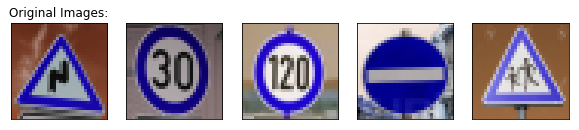

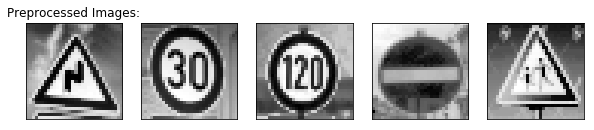

In [107]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import cv2
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
# close the plots that are open as there were too many for memory
plt.close('all')
images = np.empty([5, 32, 32, 3], dtype = int)
# these are the image identifies for the test images
# note the last 2 may actually be euro vs german and might not be in the model
image_types = np.array([21,1,8,17,28])
print("images array shape: ", images.shape)
fig = plt.figure(figsize=(10, 2))
for i in range(1, 6):
    file = "new-signs/sign_" + str(i) + ".jpg"
    image = cv2.imread(file, 1)
    image = cv2.resize(image, (32, 32), interpolation = cv2.INTER_AREA)
    images[i-1] = image
    ax = fig.add_subplot(1, 5, i, xticks=[], yticks=[])
    if i == 1: ax.set_title('Original Images:')
    ax.imshow(image)
    #plt.imshow(image)

    
fig = plt.figure(figsize=(10, 2))
X_pp, y_pp = preprocess(images, image_types)
print("pp images array shape: ",X_pp.shape)
for i in range(0, 5):
    image_pp = X_pp[i].squeeze()
    ax = fig.add_subplot(1, 5, i+1, xticks=[], yticks=[])
    if i == 0: ax.set_title('Preprocessed Images:')
    ax.imshow(image_pp, cmap="gray")

### Predict the Sign Type for Each Image

In [50]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# function to get the top k predictions from the model given image input X
def top_k_predictions(X, params, k):
    #invalidate any previously built graphs since we are using Jupyter & cells get rerun
    tf.reset_default_graph()
    print("default graph reset")
    # Build the graph - note this was added from forums after difficulty restoring saved sessions
    # not clear both reset and this are necessary but...
    graph = tf.Graph()
    with graph.as_default():
        # Placeholders for batches of images and classifications and traininig boolean
        x_predict = tf.placeholder(tf.float32, shape = (None, params.image_size[0], params.image_size[1], 1))
        is_training = tf.constant(False)
        with tf.variable_scope('sign_classifier_project'):
            predictions = tf.nn.softmax(model(x_predict, params, is_training))
            top_k = tf.nn.top_k(predictions, k)
            
    with tf.Session(graph = graph) as session:
        session.run(tf.global_variables_initializer())
        tf.train.Saver().restore(session, './traffic2')
        [p] = session.run([top_k], feed_dict = {x_predict : X})
        return np.array(p)
        '''#result = sess.run(softmax, feed_dict={x_predict: X_pp})
        #print("result found")
        values, indices = session.run(top_k, feed_dict={x_predict: X_pp})
        probs = session.run(values)
        preds = session.run(indices)
        return probs, preds  '''

params = Params(
    # Data parameters
        num_logits = 43,
        image_size = (32, 32), 
        # Training parameters
        batch_size = 128,
        epochs = 3,
        # Optimization
        learning_rate = 0.001,
        # Model architecture
        # f: filter size
        # k_out: depth/# of outputs
        # s: stride
        # kp: keep probability for dropout during training - currently only fc layers
        # could add padding here if want to make this variable
        conv1_f = 5,
        conv1_k_out = 10,
        conv1_stride = 1,
        pool1_f = 2,
        pool1_s = 2, 
        conv2_f = 5,
        conv2_k_out = 20,
        conv2_stride = 1,
        pool2_f = 2,
        pool2_s = 2,  
        fc1_k_out = 200,
        fc1_kp = 0.7,
        fc2_k_out = 84,
        fc2_kp = 0.7
)


# run the top_k_predictions on the already preprocessed data to get top 5 predictions
probs, predictions = top_k_predictions(X_pp, params, k=5)



default graph reset


In [51]:
# display predictions
print("predictions", predictions)    
print("correct classifications after shuffle:", y_pp)
print("predicted classifications", [predictions[i][0] for i in range(0,5)])
print("probabilities: ", probs)
print("softmax predictions: ", predictions)

predictions [[ 11.  30.  23.  20.  28.]
 [  1.   2.   5.   6.   0.]
 [  8.   4.  15.   7.   0.]
 [ 17.  14.   8.  33.   0.]
 [ 28.  20.  29.  24.  23.]]
correct classifications after shuffle: [21  1  8 17 28]
predicted classifications [11.0, 1.0, 8.0, 17.0, 28.0]
probabilities:  [[  2.63113290e-01   1.65907860e-01   1.65730134e-01   1.12497553e-01
    1.05847292e-01]
 [  6.36105835e-01   2.80253023e-01   2.92528998e-02   2.77181342e-02
    8.50049220e-03]
 [  8.32733691e-01   1.52049884e-01   9.11444798e-03   2.60106684e-03
    1.59870286e-03]
 [  9.99294162e-01   7.05575454e-04   6.23187333e-08   5.96050782e-08
    3.37433192e-08]
 [  6.56192482e-01   1.46821856e-01   7.65740648e-02   3.53665687e-02
    2.30659302e-02]]
softmax predictions:  [[ 11.  30.  23.  20.  28.]
 [  1.   2.   5.   6.   0.]
 [  8.   4.  15.   7.   0.]
 [ 17.  14.   8.  33.   0.]
 [ 28.  20.  29.  24.  23.]]


### Analyze Performance

In [60]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
correct_count = 0
incorrect_indices = []
for i in range(0,5):
    if int(predictions[i][0]) == y_pp[i]:
        correct_count += 1
    else:
        incorrect_indices.append(i)
print("For these 5 images the model is {:.0%} accurate".format(correct_count/5))
print(" ")
for i in range(0, len(incorrect_indices)):
    print("Incorrect Identification #", i+1)
    print("   sign: ", y_pp[i], " ", sign_types[str(y_pp[i])])
    print("was incorrectly identified as:")
    print("   sign: ", int(predictions[i][0]), " ", sign_types[str(int(predictions[i][0]))])
    print(" ")

For these 5 images the model is 80% accurate
 
Incorrect Identification # 1
   sign:  21   Double curve
was incorrectly identified as:
   sign:  11   Right-of-way at the next intersection
 


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [69]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
print("see prior cell, info repeated and formatted below")
print(" ")
np.set_printoptions(formatter={'float': '{: 0.2%}'.format})
print("probabilities: ")
print(probs)

see prior cell, info repeated and formatted below
 
probabilities: 
[[ 26.31%  16.59%  16.57%  11.25%  10.58%]
 [ 63.61%  28.03%  2.93%  2.77%  0.85%]
 [ 83.27%  15.20%  0.91%  0.26%  0.16%]
 [ 99.93%  0.07%  0.00%  0.00%  0.00%]
 [ 65.62%  14.68%  7.66%  3.54%  2.31%]]


In [114]:
# List the predicted sign types for each of the input signs
print("Note: the images were shuffled after visualization so are in a different order than above")
print(" ")
for i in range(0,5):
    print("The predictions for example", i, " sign #", y_pp[i], sign_types[str(y_pp[i])], " were:")
    for j in range (0, 5):
        print(("   probability: {: 0.2%} ").format(probs[i][j]), sign_types[str(int(predictions[i][j]))])
    print(" ")

Note: the images were shuffled after visualization so are in a different order than above
 
The predictions for example 0  sign # 21 Double curve  were:
   probability:  26.31%  Right-of-way at the next intersection
   probability:  16.59%  Beware of ice/snow
   probability:  16.57%  Slippery road
   probability:  11.25%  Dangerous curve to the right
   probability:  10.58%  Children crossing
 
The predictions for example 1  sign # 1 Speed limit (30km/h)  were:
   probability:  63.61%  Speed limit (30km/h)
   probability:  28.03%  Speed limit (50km/h)
   probability:  2.93%  Speed limit (80km/h)
   probability:  2.77%  End of speed limit (80km/h)
   probability:  0.85%  Speed limit (20km/h)
 
The predictions for example 2  sign # 8 Speed limit (120km/h)  were:
   probability:  83.27%  Speed limit (120km/h)
   probability:  15.20%  Speed limit (70km/h)
   probability:  0.91%  No vehicles
   probability:  0.26%  Speed limit (100km/h)
   probability:  0.16%  Speed limit (20km/h)
 
The pre

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")